## James Griffin
## Kaggle Competition




In [84]:
## Load a bunch of crap 

## found the virst batch on libraries on Tyler's notes 
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#from online suggestions I was reading 
from string import ascii_letters
import seaborn as sns
import statsmodels.api as sm # for linear regression, found it on some article 

# to solve problems that I am encounterinbg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #plotting for visualization purposes of story telling 
import numpy as np


In [85]:
data = pd.read_csv('C:/Users/13855/Desktop/213 Machine learning/train.csv')

test = pd.read_csv('C:/Users/13855/Desktop/213 Machine learning/test.csv')

In [86]:
print(data.shape)

print(test.shape)

## HHmm im missing a column in my test data set that my train data set is not missing 

test.head()

(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [87]:
'''Hey nelson, hope your having a good day, here is a joke: 

hey nelson, I have a girlfriend 
 you: oh yeah, whats she like, 
me: She's like the square root of -100, a perfect 10 yet perfectly imaginary 
 lolololol 
'''
data.head(5)

## thoughts -- test data set does not include final sales price, and there are ALOT 
# of categorical columns that imma have to deal with some how 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
data.isnull().sum()

## lots of missing values in alley... does that mean that they dont have data or it isnt on an alley? 
## same with pool, fense and misc features 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [89]:
## trying to see which columns which have nulls 

nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])

print(nulls)

                 0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageCond      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
Utilities        0
YearRemodAdd     0
MSSubClass       0
Foundation       0
ExterCond        0
ExterQual        0


In [90]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [91]:
## just trying to see more about what type of data I am 
#working with 

obj_data = data.select_dtypes(include =['object']).copy()

obj_data.head()

#so 43 of my variables are objects, 



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [92]:
#obj_data[obj_data.isnull().any(axis = 1)]

In [93]:
obj_data['MSZoning'].value_counts()
    
# looking at diff values for zoning, 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [94]:
lb_make = LabelEncoder()
obj_data["Shape"] = lb_make.fit_transform(obj_data['LotShape'])
obj_data[['LotShape', "Shape"]].head(5)

,LotShape,Shape
0,Reg,3
1,Reg,3
2,IR1,0
3,IR1,0
4,IR1,0


In [95]:
lb_make = LabelEncoder()
obj_data["Zoning"] = lb_make.fit_transform(obj_data['MSZoning'])
obj_data[['MSZoning', "Zoning"]].head(5)

,MSZoning,Zoning
0,RL,3
1,RL,3
2,RL,3
3,RL,3
4,RL,3


OK im thinking there has to be a better way to do this then to do this all one at a time 

In [96]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


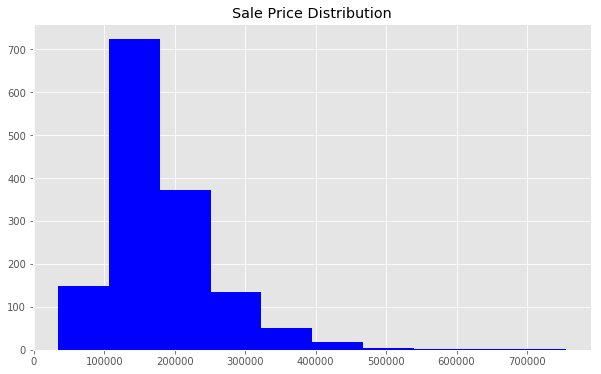

In [97]:
## imma try and find which columns are more important than others through a few plots 
## personally an R fan so we use alot of gg plot 

plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10,6)

## ok so what do I want to predict? sales price 
print(data.SalePrice.describe())

#data.SalePrice.skew()

fig = plt.figure()
plt.hist(data.SalePrice, color = 'blue')
plt.title("Sale Price Distribution")

plt.show()


# -- skewed right

We talked about in 388 and 488 all the time that taking the log of the outcome variable results in a percentage change, this results in more of a linear outcome variable when it is skewed like it is -- so gonna try and do that 

reasons being, I can control for hetero skedasticity and because it is supressed by the log function 

also if I change my independent variables to be logs aswell, I can interpret my coefficients as elasticities with my outcome variable being my dependent variable still 

and make my positively skewed data much more normal, and so much easier to deal with normal rather than non normal errors for inference purposes 


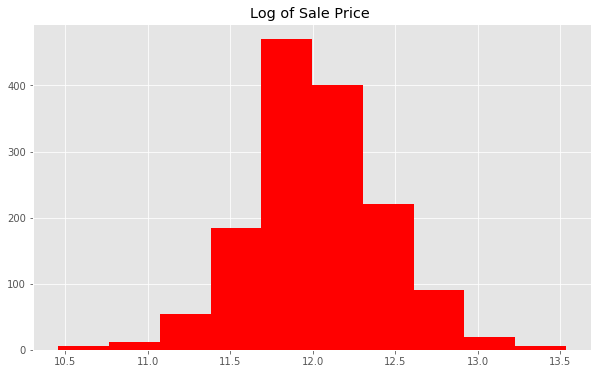

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


In [99]:
log_price = np.log(data.SalePrice)
plt.hist(log_price, color = "red")
plt.title("Log of Sale Price ")
plt.show()

print(log_price.describe())

## that looks nice and normal 


In [100]:
## gonna try and find things that are correlated with my new outcome variable 


## Which numeric columns are correlated with saleprice
numeric_features = data.select_dtypes(include=[np.number])


corr = numeric_features.corr()


# The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
print("most  positively correlated ")
print (corr['SalePrice'].sort_values(ascending=False)[:13])

print("")

print("most negative corr ")
print (corr['SalePrice'].sort_values(ascending=False)[-10:])


most  positively correlated 
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64

most negative corr 
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [101]:
## really struggling on how to take correlations between more than one column at a time so imma 
# make a function even though I feel like this should be in a library somewhere 


#def get_corrs(df):
 #   col_correlations = df.corr()
  #  col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
   # cor_pairs = col_correlations.stack()
    #return cor_pairs.to_dict()

#my_corrs = get_corrs(data)

#print(my_corrs)


'''
Like Tyler said in class, we should first build a very basic model and see see what we get, I will run a linear regression
on my sales price with some variables that I think will be statistically important 

after consulting with the data description and finding those elements that are reasonably 
highly correlated with the outcome, I think i'll just run a linear regression on the log 
of my prices with the 10 or so variables that I found to be highly correlated and see 
where that gets me 


'''

In [102]:
#gonna create a new dataframe with the positively cols

pd.get_dummies(data).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [103]:
numeric_features = data.select_dtypes(include=[np.number])


corr = numeric_features.corr()

print("most  positively correlated ")
print (corr['SalePrice'].sort_values(ascending=False)[:11])

most  positively correlated 
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


ok, after changing all of my categorical data into dummies, the most strongly correlated categories were not any of those 
categorical data, however their correlations were slightly lower. So im going to go with these and build a basic model ignoring the categorical data because they do not seam to be correlated with the outcome variable of saleprice 


In [104]:
data.GrLivArea.head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

Text(0.5, 0.98, 'Garage Area')

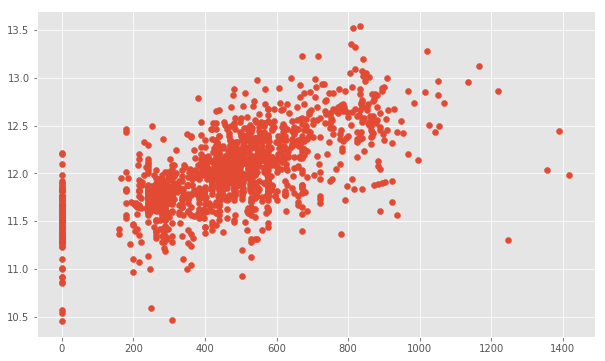

In [105]:
## OK.... I dont know whats going on with that data frame I am trying to create, sooooo I think 
## imma just choose 5 of the most highly correlated and clean those and try and do that one at a time 

plt.scatter(x = data['GarageArea'], y = log_price)
fig.suptitle("Garage Area")

Because regression is so thrown off by outliers, I think imma toss out anything that has more than a 
1200 sqft garage and anything that is 0 

(1455, 81)


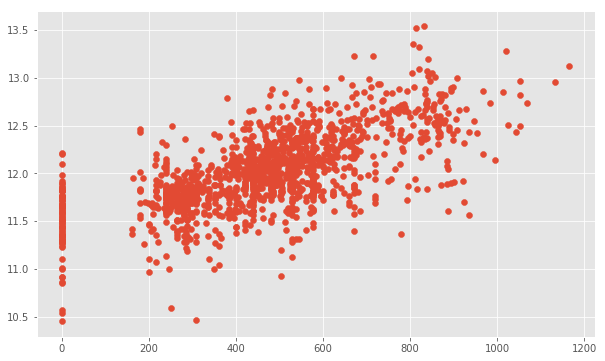

In [106]:
data = data[data["GarageArea"]< 1200]


# couldnt use log_price variable created above because they have to be the same size 
plt.scatter(x = data['GarageArea'], y = np.log(data.SalePrice))
fig.suptitle("Garage Area without outliers ")
print(data.shape)

Text(0.5, 0.98, 'Total Basement Square Feet ')

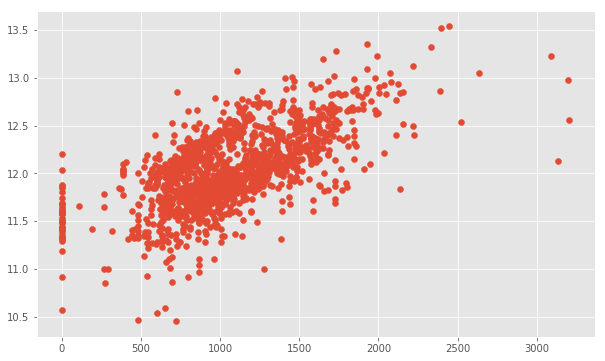

In [107]:

plt.scatter(x = data['TotalBsmtSF'], y = np.log(data.SalePrice))

fig.suptitle("Total Basement Square Feet ")

I think imma do the same thing I did with garage sqare feet and remove anyting bigger than 3000, I thought about getting rid of any bigger than 2500, but I don't feel like those ones are too far outside the best fit line that I draw in my head lol 

Text(0.5, 0.98, 'Total Basement Square Feet without outliers ')

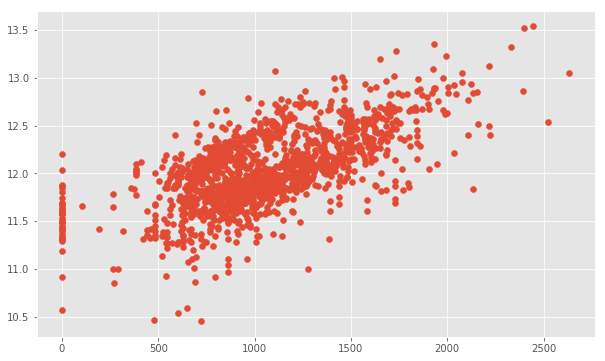

In [108]:
data = data[data["TotalBsmtSF"]< 3000]


plt.scatter(x = data['TotalBsmtSF'], y = np.log(data.SalePrice))

fig.suptitle("Total Basement Square Feet without outliers ")


In [109]:
print(data.shape)

(1451, 81)


Text(0.5, 1.0, 'General Living Area Square Feet  ')

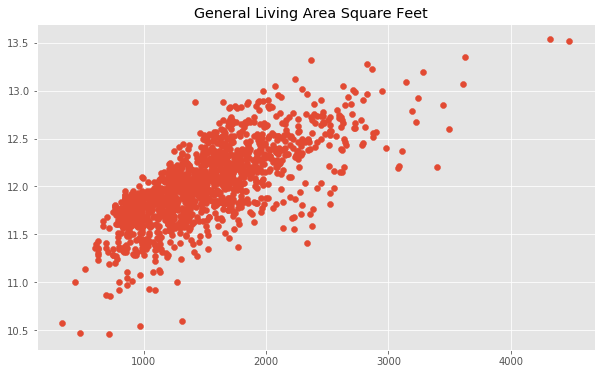

In [111]:
## looking at GR living area -- which is square feet living area 
plt.scatter(x = data['GrLivArea'], y = np.log(data.SalePrice))

plt.title("General Living Area Square Feet  ")

Text(0.5, 1.0, 'General Living Area Square Feet  without outliers ')

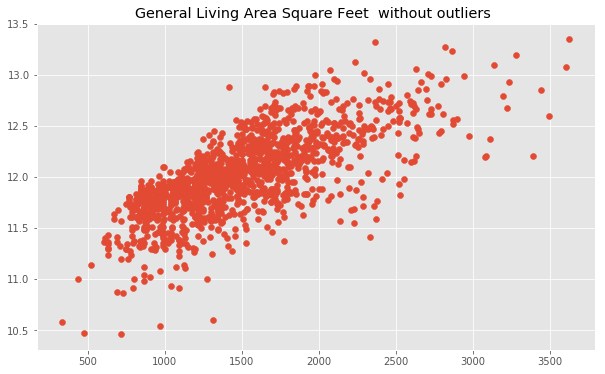

In [112]:
#Imma drop those last two data points greater than 4000 


data = data[data["GrLivArea"]< 4000]

plt.scatter(x = data['GrLivArea'], y = np.log(data.SalePrice))

plt.title("General Living Area Square Feet  without outliers ")


In [28]:
print(data.shape)

(1449, 81)


In [29]:
#gonna do the same thing for first floor square footage 

Text(0.5, 1.0, 'First Floor Square Feet   ')

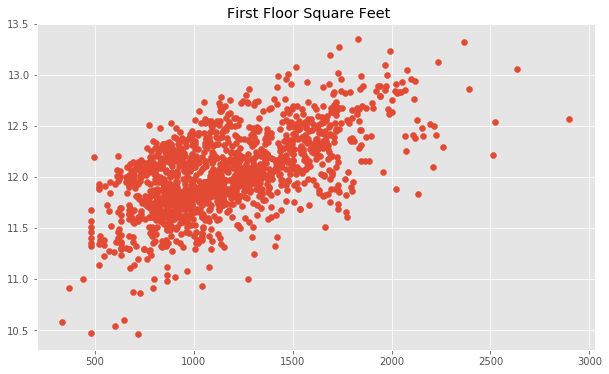

In [113]:
#looking at first floor square foot 

plt.scatter(x = data['1stFlrSF'], y = np.log(data.SalePrice))

plt.title("First Floor Square Feet   ")

Text(0.5, 1.0, 'General Living Area Square Feet  without outliers ')

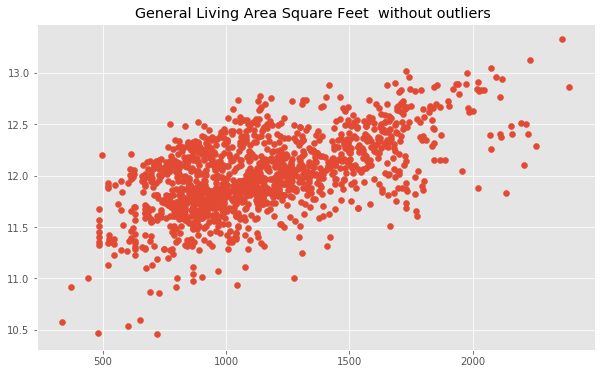

In [114]:
data = data[data["GrLivArea"]< 2500]

plt.scatter(x = data['1stFlrSF'], y = np.log(data.SalePrice))

plt.title("General Living Area Square Feet  without outliers ")


In [32]:
print(data.shape)

(1384, 81)


Text(0.5, 1.0, 'Year Built')

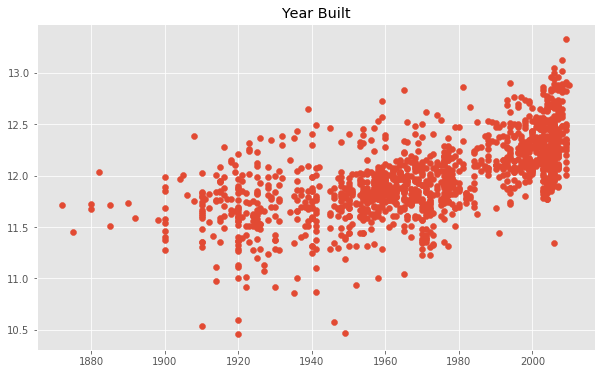

In [115]:
plt.scatter(x = data['YearBuilt'], y = np.log(data.SalePrice))

plt.title("Year Built")


## ok, now that I have gotten rid of some of the biggest outliers, I think imma just
## run a basic regression, see how this goes using some of the variables I cleaned and
## The log of my sales price as my outcome variable

In [116]:
data['FullBath'].dtypes


dtype('int64')

In [117]:
#OverallQual

#plt.scatter(x = data['OverallQual'], y = np.log(data.SalePrice))

Building data frame with only correlated columns 

In [118]:
#c_num_data = pd.DataFrame([data["OverallQual"], data['GrLivArea'],
 #                        data['GarageCars'], data['GarageArea'], data['TotalBsmtSF'],  
  #                       data['1stFlrSF'], data['YearBuilt'],data['FullBath']])

# don't need to use pandas.df because already in data frame format, this way the
# columns dont become rows lol 

c_num_data = data[['OverallQual', 'GrLivArea', 'GarageCars',
                  'GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF',
                  '1stFlrSF', 'YearBuilt', 'FullBath']]

In [119]:
c_num_data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath
0,7,1710,2,548,8,856,856,2003,2
1,6,1262,2,460,6,1262,1262,1976,2
2,7,1786,2,608,6,920,920,2001,2
3,7,1717,3,642,7,756,961,1915,1
4,8,2198,3,836,9,1145,1145,2000,2


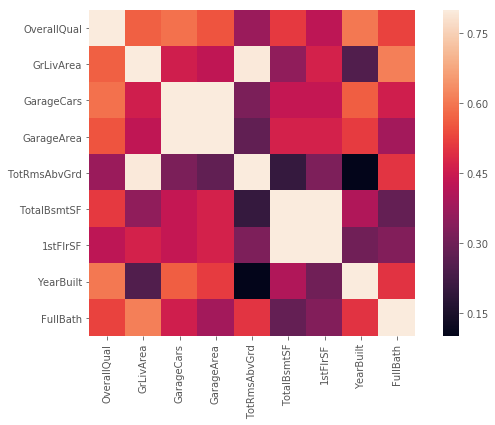

In [120]:
corr_mat = c_num_data.corr()
f, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(corr_mat,vmax=.8,square=True)

## this is just a vizualization, these are all very higly correlatd with overallQual, 
# it doesn't look like there is too much auto correlation between variables. 

## model 1, linear regression 

In [121]:
x = c_num_data

y = np.log(data.SalePrice)

scaler = StandardScaler()

scaler.fit(x)

scaler_df = scaler.transform(x)

linear_regression_model = SGDRegressor(tol = .001, eta0 = .01)

linear_regression_model.fit(c_num_data, y)

predictions = linear_regression_model.predict(c_num_data)

mse = mean_squared_error(y, predictions)

print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 1958424334368798.5


C:\Users\13855\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\13855\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Well, that model sucked, I was really suprised at how massive my mean squared error is, I am going to try and get a better score by using a different type of model and maybe a few more variables. Although I guess the result isn't too surprising because I ignore multi colinearity, factors where both 1st floor square feet and gr living space are probably very related, where things like garage size and number of car garage is totally correlated so their error terms would be correlated 

## Questions about model 

#1 this is the first model i tried.  I tried it because it was a simple thing to start with that I could build and build my other models off of and see how they compared. Also Tyler recommended we do a simple linear regression.

    The assumptions for this model aren't great.  A linear regression assums no multi coliniarity, and no auto correlation which is not true, I use a lot of variables that are obviously correlated, like square footage of a garage and the number of cars garage etc.  so these assumptions are not met which is probably part of my big mean squared error. -- I didn't really account for them, because Tyler said it wasn't a big deal. this model does not have hyper perameters 
    
    
    Model Interpretation: 
    Since the mean squared error is so high, it doesn't tell me a whole lot.  The correlation excersizes that I went through tell me that the variables I chose are highly correlated with the outcome price, so thats why I picked them and thought they would be good for future models understanding that this model wouldn't be the greatest given that it is linear regression and that has some violated assumptions.  
    
    Model Usefulness: 
    because my mean squared error was so high, I don't think it is that useful.  I wouldn't give my model to anyone else, not very good. 

Gonna do a more robust linear model, an SGD regressor  to try and get a better RMSE 

In [122]:
y = np.log(data.SalePrice)

y.head()

print(y.shape)

print(c_num_data.shape)

(1384,)
(1384, 9)


In [41]:
## starting with a randomized serach for parameters 
#lerning rate and tolerance 

#tuning my model, using a validation set


from sklearn.model_selection import RandomizedSearchCV

#this is my learning rate which is one of my hyper perameters, as is my tolerance 
param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3]}

linear_regression_model = SGDRegressor(tol=.0001)

n_iter_search = 12
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')

random_search.fit(c_num_data, y)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))



C:\Users\13855\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=12. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Parameters: {'eta0': 0.001}
Best Negative MSE: -1.3751611835024815e+29


C:\Users\13855\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Questions 

Model Selection:
The SGD Regressor i thought would work and I chose it because I'm in 314 right now and have discussed the gradient and how it works / what it does, and I was thinking that stochastic aspect of this model would actually work really well given the problem.  Turns out it is pretty trash, even with randomly searching over my learning rate, and chosing my tolerance to be really small, my MSE is still humongous, obviouslt not a good result / model for this data. 

Model Interpretation: 
The results don't tell me a whole lot, because the error is so big, whatever it does tell me is not very accurate, I used the same variables as my linear regression, which from my cleaning stage, I know are highly correlated with the outcome variable, but did not do a good job predicting this outcome in this model. -- maybe I could chose smaller values for learning rates, to try and maybe decrease the model, but I don't think that would do much because it is a random search across a bunch of values, so you'd think that would be better than me picking. I am not confident in my results 

Model Usefulness:
given the MSE not very useful, and NO I sould not recommend using this to a company, because it does not predict well. 



## model number 3 - Elastic Net Model 


In [43]:
from sklearn.linear_model import ElasticNetCV

## cleaning data the same way I did for my training set 
 question tho, how do I clean the data when I used the 
 outcome of sales price to clean the training data... 
unfortunently I didn't think about this when I was 
cleanign the data in the first place 


 lets see if this works 

In [44]:
## I need to make the log of my sales price the same size
# of my test data before I clean it, 

#going to re load my train set to clean my data real fast

train = pd.read_csv('C:/Users/13855/Desktop/213 Machine learning/train.csv')
log_price = np.log(train.SalePrice)

# now checking to see if the data I want to use has missing values 

nulls_t = pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:35])

print(nulls_t)

#train.head()


                 0
PoolQC        1456
MiscFeature   1408
Alley         1352
Fence         1169
FireplaceQu    730
LotFrontage    227
GarageCond      78
GarageQual      78
GarageYrBlt     78
GarageFinish    78
GarageType      76
BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtHalfBath     2
Utilities        2
Functional       2
BsmtFullBath     2
BsmtFinSF2       1
BsmtFinSF1       1
Exterior2nd      1
BsmtUnfSF        1
TotalBsmtSF      1
SaleType         1
Exterior1st      1
KitchenQual      1
GarageArea       1
GarageCars       1
HouseStyle       0
LandSlope        0


unfortunently some of the variables I used have missing values, I think that I will just fill in the missing values with
the mean because I used all numeric columns and since there isnt lots of missing data, I dont think this is a bad assumption

here all my columns 
['OverallQual', 'GrLivArea', 'GarageCars',
                  'GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF',
                  '1stFlrSF', 'YearBuilt', 'FullBath']
                  
none in overal quality, none in gr living area, none in garage cars, ONE in garage area, 
Totrms above ground has none, ONE in TotalBsmtSF, 1st floor has none, year built, has none, and full bath has none 


In [45]:
#filling in missing with mean 

test.loc[test['TotRmsAbvGrd'].isnull(),'TotRmsAbvGrd'] = test['TotRmsAbvGrd'].mean()
test.loc[test['GarageArea'].isnull(),'GarageArea'] = test['GarageArea'].mean()
test.loc[test['TotalBsmtSF'].isnull(),'TotalBsmtSF'] = test['TotalBsmtSF'].mean()
test.loc[test['GarageCars'].isnull(),'GarageCars'] = test['GarageCars'].mean()


## ok build the data frame that I used to train 

test_vari = test[['OverallQual', 'GrLivArea', 'GarageCars',
                  'GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF',
                  '1stFlrSF', 'YearBuilt', 'FullBath']]

print(test_vari.isnull().sum())

## ok no null values 

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotRmsAbvGrd    0
TotalBsmtSF     0
1stFlrSF        0
YearBuilt       0
FullBath        0
dtype: int64


In [46]:
#creating a test 
x_train, x_test, y_train, y_test = train_test_split(c_num_data, y)

In [51]:
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
#clf = ElasticNetCV(l1_ratio=[0.0001], alphas=[.1, 1, 10])

#alpha is what kind of penalty I am giving a coeficients that don't do well get penalized, so when alpha = 0
#thats basically ols because there is no penalty, 

## the higher alpha is, the more uncorrelated variables will 
#print(clf)
# be closer to zero 

clf.fit(x_train, y_train)

train_predictions = clf.predict(x_train)
#test_predictions = clf.predict(test_vari)

print("Train MSE: {}".format(mean_squared_error(train_predictions, y_train)))

print("bruh thats small")

Train MSE: 0.025440621289142477
bruh thats small


C:\Users\13855\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


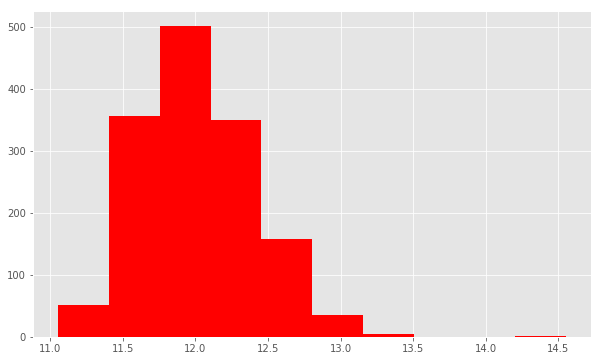

       OverallQual    GrLivArea   GarageCars   GarageArea  TotRmsAbvGrd  \
count  1459.000000  1459.000000  1459.000000  1459.000000   1459.000000   
mean      6.078821  1486.045922     1.766118   472.768861      6.385195   
std       1.436812   485.566099     0.775679   216.974165      1.508895   
min       1.000000   407.000000     0.000000     0.000000      3.000000   
25%       5.000000  1117.500000     1.000000   318.000000      5.000000   
50%       6.000000  1432.000000     2.000000   480.000000      6.000000   
75%       7.000000  1721.000000     2.000000   576.000000      7.000000   
max      10.000000  5095.000000     5.000000  1488.000000     15.000000   

       TotalBsmtSF     1stFlrSF    YearBuilt     FullBath  
count  1459.000000  1459.000000  1459.000000  1459.000000  
mean   1046.117970  1156.534613  1971.357779     1.570939  
std     442.746712   398.165820    30.390071     0.555190  
min       0.000000   407.000000  1879.000000     0.000000  
25%     784.000000   873

In [71]:
test_predict = clf.predict(test_vari)

plt.hist(test_predict, color = "red")
plt.show()

pred = pd.DataFrame(test_vari)

print(pred.describe())


In [52]:
#clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
## the higher alpha is, the more uncorrelated variables will 
# be closer to zero 

#clf.fit(c_num_data, y)
#clf.fit(test_vari, y)

prediction = clf.predict(x_test)
print("test MSE: {}".format(mean_squared_error(prediction, y_test)))

print(prediction)

test MSE: 0.0212831467802646
[12.21414699 11.90059592 11.30579919 12.21220193 12.02283405 12.15715952
 12.59932318 12.3054202  11.75808989 12.4084088  11.81090293 11.59122558
 12.43929039 11.69551256 11.70475477 12.46672723 11.21715976 12.31882951
 11.94018612 11.68478751 11.66940224 11.99519077 11.54244557 11.72268026
 12.32379208 12.10574899 12.73726974 12.18731956 12.38916207 12.00038008
 12.10528036 12.02975894 11.70621944 11.52986435 11.65957552 12.46176641
 12.733958   11.74007055 11.69710844 11.53033543 12.45561369 12.47702986
 12.49644552 11.40493559 11.90300864 12.48990174 11.93341215 11.74092026
 12.21243536 11.71933972 12.16017676 12.38016578 12.11656627 12.29828708
 11.70179051 12.6776339  12.13007134 11.34531167 11.88832371 11.43219448
 11.66443951 11.68282165 12.24719075 11.7228735  11.69782325 12.65022442
 11.67189753 12.62941956 11.36912608 11.57257003 11.68260121 11.84999636
 12.16784124 12.56614735 12.45211888 11.60139197 11.72695541 12.05055844
 11.37615716 11.931994

These are the logs of my predictions, which look awesome, they have the basically the same mean and same standard deviation
as the graph from the train data and these are my test predictions.

In [77]:
house_num = test.Id

In [78]:
sub = pd.DataFrame({'id':house_num, "SalePrice":test_predict}) 
sub.to_csv("FILE", index = False)

In [79]:
print(clf.coef_)

test_vari.head()

# these are all suprisingly very small and similary, although it looks like the biggest one is 
#overal quality year built and square footage of the first floor, and garage area. 

[ 7.27423471e-02  3.10329324e-04  0.00000000e+00  2.64201847e-04
 -0.00000000e+00  1.79478162e-04  2.88555292e-05  3.06827043e-03
 -0.00000000e+00]


,OverallQual,GrLivArea,GarageCars,GarageArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath
0,5,896,1.0,730.0,5.0,882.0,896,1961,1
1,6,1329,1.0,312.0,6.0,1329.0,1329,1958,1
2,5,1629,2.0,482.0,6.0,928.0,928,1997,2
3,6,1604,2.0,470.0,7.0,926.0,926,1998,2
4,8,1280,2.0,506.0,5.0,1280.0,1280,1992,2


## Questions


model selection:
The Elastic Net model is a mix of the lasso and ridge, I found that the more ridge I did, the better and better my MSE became, so I set my L1 ration to be .0001 so that it would be essentially a ridge model. My hyper parameters are my alphas, the penalization rate of my coeficients that predict poorly the outcome.  Those two, L1 and alpha are my hyper perameters for this model. 

Model Interpretation: 
I used a train test split on my data to maximize both the amount of train data and the amount of test data.  I split it into a training data set of .75 and a test size of .25 by default. Again, I used the variables that were highly correlated, and if you look at the graph that it outputted, the mean and standard deviation of my train data were 12.02405 and 0.399452, where as the mean and std dev of my predictions were 12.018007 and 0.380050, so pretty close there.  That with a low mean squared error, tells me that my predictions are accurate to the log of the sales price with roughly the same mean and distribution. So I am confident in the results because of those tow things. 

Model Usefulness:
Yes I think they are useful, the model preforms well and I would feel comfortable predicting the sales price of a home, simply raise it to the e, and that would give me the price.  The model will preform best on homes that are on the inner quartile range, but outside of that, there are obviously other variables at play so it makes it harder to trust the model. 